In [1]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(10000)
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN
9999,2022-06-17 09:14:54,Impossible to use on lock screen anymore. Trie...,2,0,NaN


In [2]:
data.isnull().sum()

Time_submitted       0
Review               0
Rating               0
Total_thumbsup       0
Reply             9979
dtype: int64

In [3]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

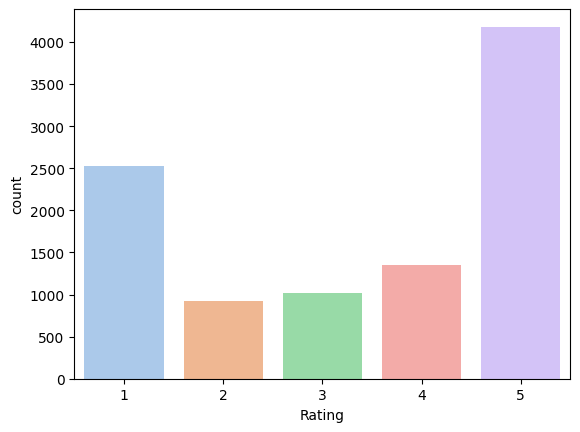

In [4]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [5]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


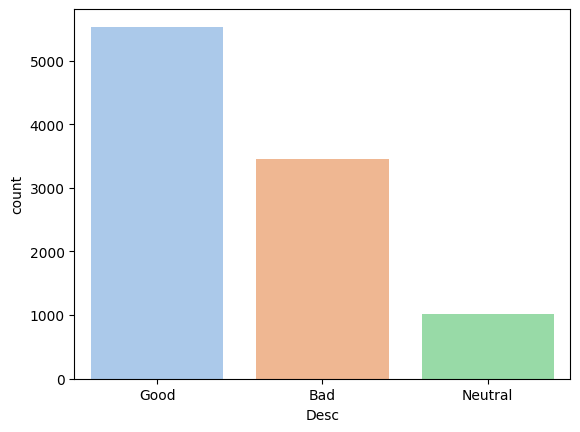

In [6]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

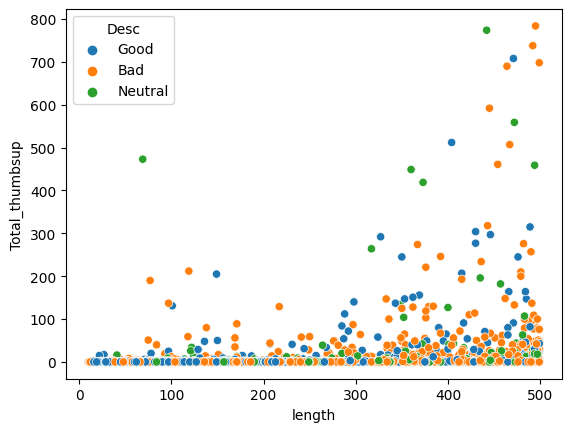

In [7]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 800], hue=data['Desc'])

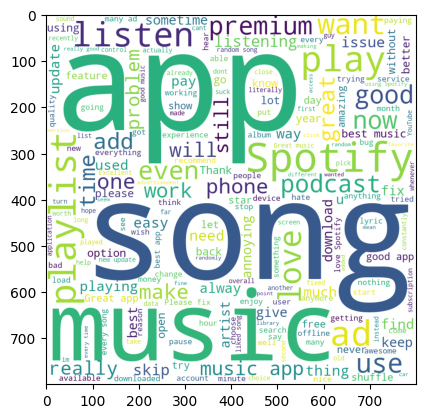

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = " ".join(data.loc[:, 'Review'])
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(reviews)
plt.imshow(wordcloud)

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:,'Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: re.sub ('[^a-z A-Z 0-9-]+', '',word))

stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word:" ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]


0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train 

array([2, 1, 1, ..., 0, 1, 1])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 299)	1
  (0, 2981)	1
  (0, 3289)	1
  (0, 3844)	1
  (0, 3859)	1
  (0, 4729)	1
  (0, 5539)	1
  (1, 529)	1
  (1, 1982)	1
  (1, 3101)	1
  (1, 3598)	1
  (1, 3768)	1
  (1, 4847)	1
  (2, 1786)	1
  (2, 1902)	1
  (2, 2307)	1
  (2, 3380)	1
  (3, 9)	1
  (3, 723)	1
  (3, 2273)	1
  (3, 2923)	1
  (3, 3006)	1
  (3, 3654)	1
  (3, 3767)	1
  (3, 3774)	1
  :	:
  (7497, 3465)	1
  (7497, 3570)	1
  (7497, 3573)	1
  (7497, 3611)	1
  (7497, 3938)	1
  (7497, 4014)	2
  (7497, 4149)	1
  (7497, 4582)	2
  (7497, 4714)	1
  (7497, 4767)	1
  (7497, 5131)	1
  (7497, 5290)	1
  (7497, 5329)	1
  (7497, 5539)	2
  (7497, 5664)	1
  (7497, 5734)	2
  (7497, 5767)	1
  (7497, 5801)	1
  (7497, 5870)	1
  (7498, 814)	1
  (7498, 3859)	1
  (7498, 4729)	1
  (7499, 682)	1
  (7499, 3907)	1
  (7499, 4916)	1


In [13]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range = (2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 7348)	0.13998527728421514
  (0, 7345)	0.13882846041589678
  (0, 7265)	0.15116956916341734
  (0, 7236)	0.08970963096465402
  (0, 6790)	0.12453918940314032
  (0, 6785)	0.07765607498653049
  (0, 6283)	0.11686124253273503
  (0, 6256)	0.05746858476459464
  (0, 6194)	0.06821481618603226
  (0, 6179)	0.16004645753669275
  (0, 6178)	0.13236414529866256
  (0, 6151)	0.09399398697710191
  (0, 6140)	0.08175886831011395
  (0, 6033)	0.12852871083938028
  (0, 6032)	0.09765876418103521
  (0, 5962)	0.25456314376976424
  (0, 5933)	0.11127166967239097
  (0, 5472)	0.1968261581053942
  (0, 5470)	0.17557490491455607
  (0, 5172)	0.09343138821653749
  (0, 5162)	0.07034726621146428
  (0, 4794)	0.09202083072692055
  (0, 4793)	0.08652485117887716
  (0, 4559)	0.23304005324516164
  (0, 4547)	0.11998495411873808
  :	:
  (7499, 6194)	0.15457965891391554
  (7499, 5491)	0.19223630242388257
  (7499, 5488)	0.11126303887806895
  (7499, 5071)	0.19309546132643873
  (7499, 5067)	0.1283860115136349
  (7499, 4316)	0.1614

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7688


In [15]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF: {rf_tfidf}')

Random Forest Classifier on TF-IDF: 0.7508


In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7732


In [17]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.7604


In [18]:
model = {'Model':['RF-Count', 'RF-TFIDF', 'MNB-Count','MNB-TFIDF'], 'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]}
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.7688
1,RF-TFIDF,0.7508
2,MNB-Count,0.7732
3,MNB-TFIDF,0.7604


<AxesSubplot: xlabel='Score', ylabel='Model'>

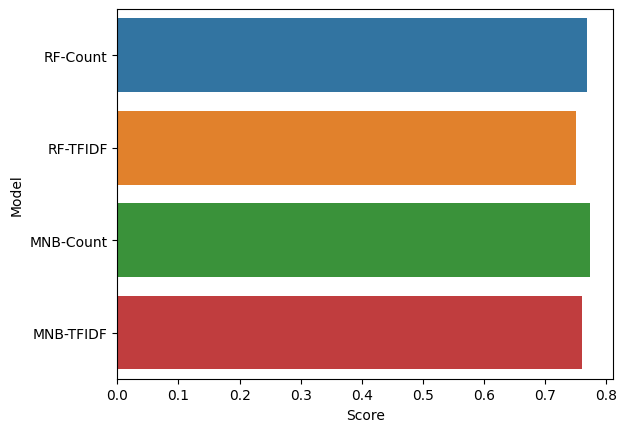

In [19]:
sns.barplot(data=model_df, y='Model', x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

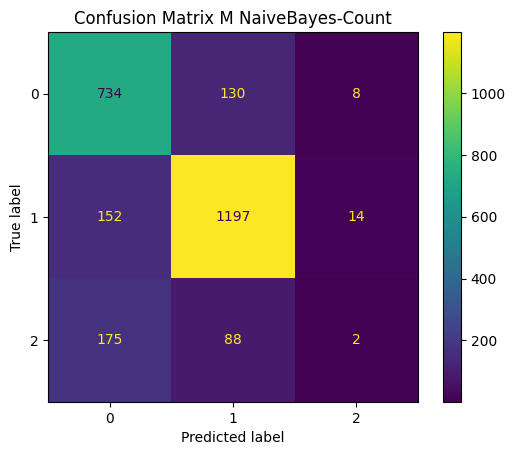

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1,
X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [21]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [22]:
test_reviews = ['This is a great app!',
'No control options from my phones ',
'I like the song selection, but the ads are annoying',
'bad ui']

pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [23]:
result = pd.DataFrame({'Reviews':test_reviews, 'Outcome': pred_transformed})

result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


<AxesSubplot: xlabel='Outcome', ylabel='count'>

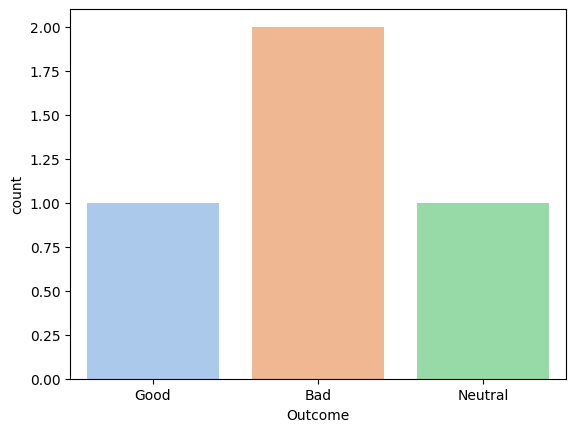

In [24]:
sns.countplot(x='Outcome', data=result, palette='pastel')